#  Machine Learning Classification Project <br> <br>- Predicting Churn - <br>
##  Implementing ML Models: Logistic Regression / K-Neighbors / Decision Trees <br><br> ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

###  <span style="color:steelblue">  Customer Churn is usualy used to quantify the number of customers who have either<br> unsubscribed OR canceled their service contract. </span>

<img src="leave.jpg" title="www.callbox.com.sg" style="width: 500px;"/>

                                                                                     www.callbox.com.sg

### The purpose of this work: Identifing at least 70% of telecom customers <br> with the intention of leaving the company in the near future. <br> 3 predictive Machine Leaning classification models where used in python, on telecom dataset. 
***

## Steps
#### 1. Data Collection

#### 2. EDA - Data Exploration and Preprocessing

#### 3.  Machine Lerning
> 3.1  Logistic Regression Model <br>
> 3.2  Churn estimation with K-nearest neighbors (KNN) classifier <br>
> 3.3  Decision Trees -  classification method
#### 4.  Some observations

## <span style="color:violet"> ENJOY ! </span>

In [1114]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
from matplotlib.font_manager import FontProperties
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score, train_test_split as split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, pairwise_distances
from sklearn.preprocessing import QuantileTransformer, RobustScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.preprocessing import MaxAbsScaler, LabelEncoder
from sklearn.metrics import average_precision_score, f1_score, log_loss, precision_score
from sklearn.metrics import recall_score
from sklearn.utils import resample
from sklearn.model_selection import validation_curve
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sys import modules
#import graphviz as pgv
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [1115]:
class pcolor:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    OKRED = '\033[41m'
    OKPUR = '\033[45m'
    OKCYN = '\033[46m'
    OKYELL = '\033[43m'
    BGBLUE = '\033[44m'
    OKBLINK = '\033[6m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

## 1.  Data Collection

In [1116]:
telecom_data_s = pd.read_csv('Telco-Customer-Churn.csv')
telecom_data = telecom_data_s.copy()
telecom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2.  EDA - Data Exploration and Preprocessing

### General Data Information

In [1117]:
#telecom_data.info()

### Replacing some features to numeric and nulls check

In [1118]:
replc = {
      r'Yes': 1,
      r'No': 0}
telecom_data['Churn'].replace(replc, regex=True, inplace=True)
telecom_data['TotalCharges'] = pd.to_numeric(telecom_data['TotalCharges'], errors='coerce')

In [1119]:
telecom_data.isnull().sum() 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Reset 'total charges' nulls - For new customers

In [1120]:
telecom_data.loc[telecom_data['TotalCharges'].isnull(),'TotalCharges'] = 0  # reset oll null charges

In [1121]:
telecom_data.isnull().sum()  # No Null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [1122]:
print(pcolor.BOLD + pcolor.UNDERLINE + pcolor.OKBLUE + 'Total customers:' + pcolor.END + '    '+ pcolor.OKBLUE + '{:,d}'.format(telecom_data.shape[0]) + pcolor.END)
print(pcolor.BOLD + 'On-Going customers: {:,d}'.format(len(telecom_data[(telecom_data['Churn']==0)])))
print(pcolor.BOLD + 'Churn customers:    {:,d}'.format(len(telecom_data[(telecom_data['Churn']==1)]))) 

Total customers:    7,043
On-Going customers: 5,174
Churn customers:    1,869


#### 

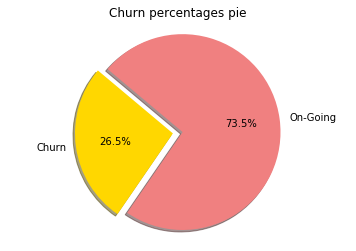

In [1123]:
# Churn pie plot
labels = 'Churn', 'On-Going'
fls, tru = telecom_data['Churn'].value_counts() 
sizes = [tru, fls]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Churn percentages pie')
plt.axis('equal')
plt.show()

### Geting to know the data Plots

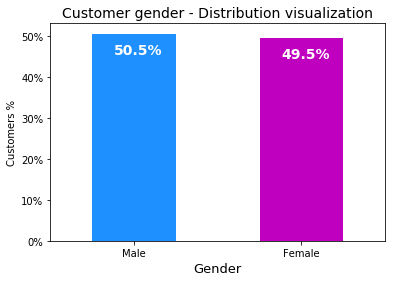

In [1124]:
# Customer gender - Distribution plot
ax = (telecom_data_s['gender'].value_counts()*100.0 / len(telecom_data_s)).plot(kind='bar',stacked=True,rot=0,
                                                                                color=['dodgerblue','m'])
totals = []
# create a list of values
for i in ax.patches:
    totals.append(i.get_width())    
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('Gender', size = 13)
ax.set_ylabel('Customers %')
ax.set_title('Customer gender - Distribution visualization', size = 14)
total = sum(totals)
# set text and position (get_x pulls left or right; get_y pushes up or down)
for i in ax.patches:
    ax.text(i.get_x()+0.13, i.get_height()-5,str(round((i.get_height()/total), 1))+'%', 
            fontsize=14, color='white',weight = 'bold')

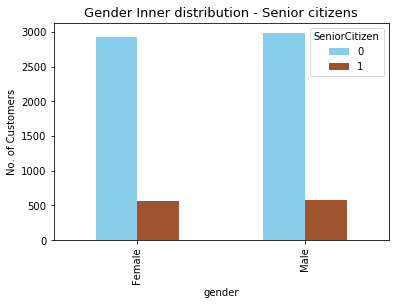

In [1125]:
# Senior citizens by Gender plot
ax = telecom_data_s.groupby(['gender', 'SeniorCitizen'] )['SeniorCitizen'].count().unstack(1).plot.bar(
    figsize=(6, 4),color=('skyblue','sienna'))
                                                                                                       
ax.set_ylabel('No. of Customers')                                                                                                    
ax.set_title('Gender Inner distribution - Senior citizens', size =13);

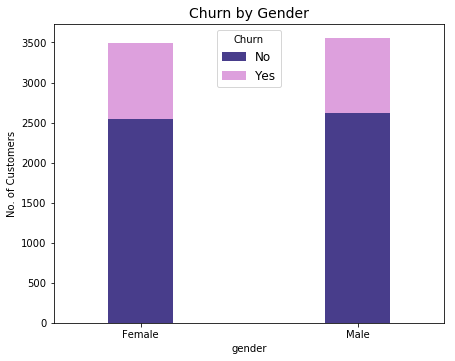

In [1126]:
# Churn by Gender plot
churn_genger = telecom_data_s.groupby(['gender','Churn']).size().unstack()

ax = churn_genger.plot(kind='bar', width = 0.3, stacked = True, rot = 0, 
                                                          figsize = (7,5.5), color = ['darkslateblue','plum'])
ax.legend(loc='upper center',prop={'size':12},title = 'Churn')
ax.set_ylabel('No. of Customers')
ax.set_title('Churn by Gender',size = 14);

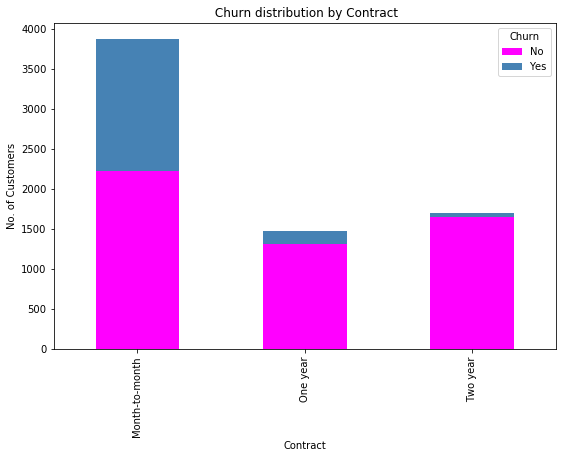

In [1127]:
# Churn distribution by Contract
ax = telecom_data_s.groupby(['Contract','Churn']).size().unstack().plot(kind = 'bar',
                                                                        stacked = True,
                                                                        figsize = (9,6),
                                                                        color=['fuchsia','steelblue','blueviolet'])
ax.set_ylabel('No. of Customers')
ax.set_title(' Churn distribution by Contract');

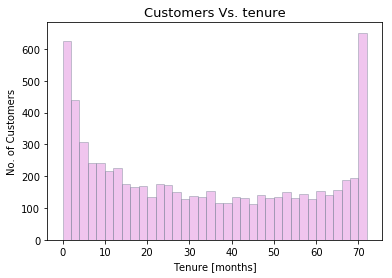

In [1128]:
# Customers Vs. tenure plot
ax = sns.distplot(telecom_data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'orchid', 
             hist_kws={'edgecolor':'slategrey'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure [months]')
ax.set_title('Customers Vs. tenure', size = 13);

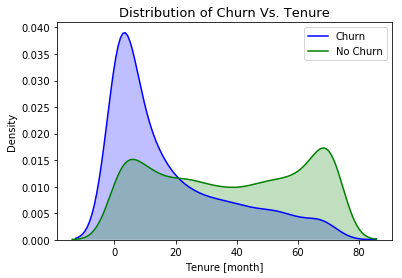

In [1129]:
# Churn Vs. Tenure Distribution plot
ax = sns.kdeplot(telecom_data_s.tenure[(telecom_data_s['Churn'] == 'Yes') ],
                color="blue", shade = True)
ax = sns.kdeplot(telecom_data_s.tenure[(telecom_data_s['Churn'] == 'No') ],
                ax =ax, color="green", shade= True)
ax.legend(['Churn', 'No Churn'], loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure [month]')
ax.set_title('Distribution of Churn Vs. Tenure', size = 13);

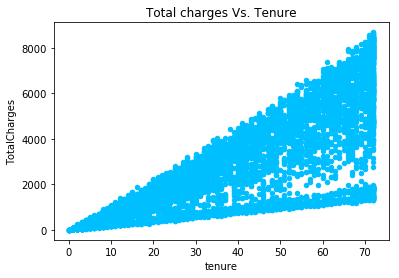

In [1130]:
# Total charges Vs. Tenure plot
ax = telecom_data.plot('tenure', 'TotalCharges', kind='scatter', color = 'deepskyblue');
ax.set_title('Total charges Vs. Tenure');

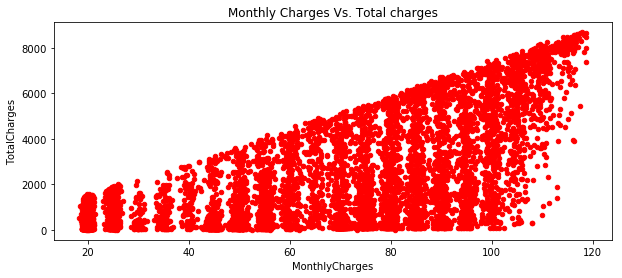

In [1131]:
ax = telecom_data.plot('MonthlyCharges', 'TotalCharges', kind='scatter', color = 'red', figsize=(10,4));
ax.set_title('Monthly Charges Vs. Total charges');

### Converting data features into dummies

In [1132]:
df_dumm_data = pd.get_dummies(telecom_data[telecom_data.columns[1:]] ) # without customerID
df_dumm_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


### Find connections

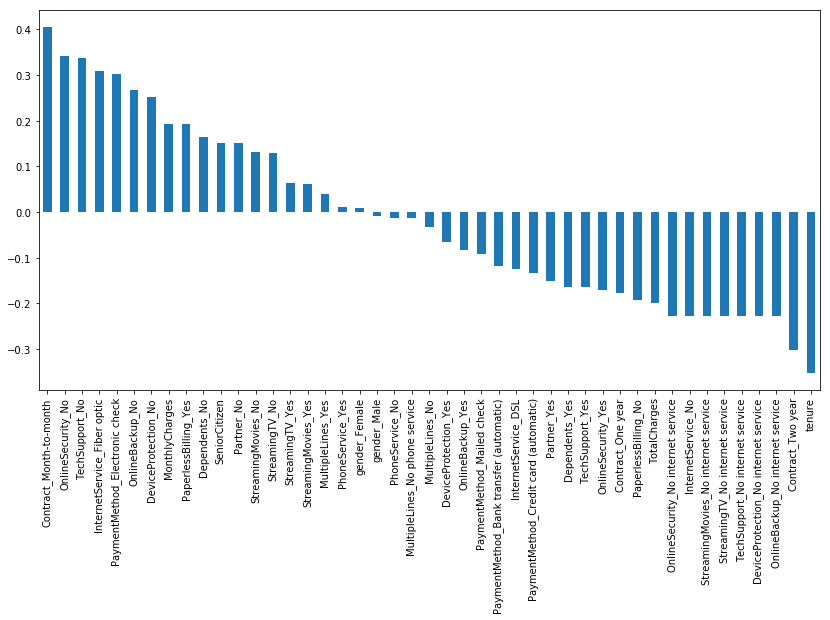

In [1133]:
# Churn correllation with data features
plt.figure(figsize=(14,7))
corr = df_dumm_data.corr()['Churn']
corr = corr[corr != 1]
corr.sort_values(ascending = False).plot(kind='bar');

#### Remarks:
* Positively correlated with churn:Contract m2m, no online security, no tech-support and  fiber-optic internet service..
* Negetively correlated: Tenure, two year contract, no internet service.. 

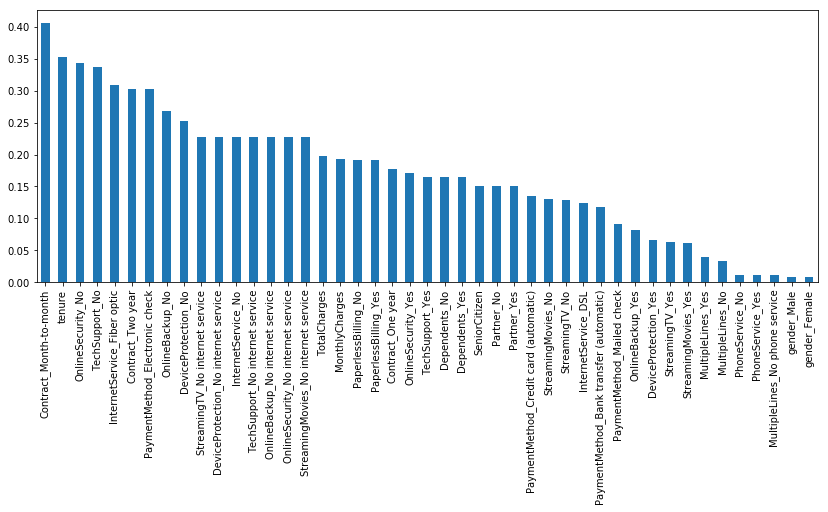

In [1134]:
# Removing self correlation and invers negetive correlation
plt.figure(figsize=(14,5))
corr = df_dumm_data.corr()['Churn']
corr = corr[corr != 1]
abs(corr).sort_values(ascending = False).plot(kind='bar');

### Adding strong correlated features as new features :

df_dumm_data['added_contract_m2m']=df_dumm_data['Contract_Month-to-month']*10
df_dumm_data['added_tenure']=df_dumm_data['tenure']*10
df_dumm_data['added_onlineSecurity']=df_dumm_data['OnlineSecurity_No']*10
df_dumm_data['added_techSuport']=df_dumm_data['TechSupport_No']*10
df_dumm_data['added_fiber_optic']=df_dumm_data['InternetService_Fiber optic']*10

## Handling Imbalanced Data with Downsampling

<img src="Downsampling.png" title="=" alt="d" style="width: 500px; hight: 200px"/>

In [1135]:
# Clear dfs from previouse run
#del df_train
#del df_test

In [1220]:
# split the data
df_train, df_test= split(df_dumm_data, train_size=0.7, random_state=42) # 8128 

# Separate majority and minority classes
df_majority = df_train[df_train.Churn==0]
df_minority = df_train[df_train.Churn==1]

print(pcolor.BOLD +pcolor.UNDERLINE + pcolor.OKBLUE +'On the Train set:' + pcolor.END)
print(pcolor.BOLD + 'Not churn:', df_majority.shape[0])
print(pcolor.BOLD + 'churn:', df_minority.shape[0])

On the Train set:
Not churn: 3635
churn: 1295


### Downsample majority class (not churn) to match the minority (churn)

In [1221]:
df_majority_downsampled = resample(df_majority, 
                                 replace=False,     # sample without replacement
                                 n_samples=2600,  # to be twice the minority class 30-70
                                 random_state=42)  # reproducible results

In [1222]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
print(pcolor.BOLD + pcolor.UNDERLINE + pcolor.OKBLUE + 'Train downsampled data:' + pcolor.END + '    '+ pcolor.OKBLUE + '{:,d}'.format(df_downsampled.shape[0]) + pcolor.END)
print(pcolor.BOLD + 'On-Going customers: {:,d}'.format(len(df_downsampled[(df_downsampled['Churn']==0)])))
print(pcolor.BOLD + 'Churn customers:    {:,d}'.format(len(df_downsampled[(df_downsampled['Churn']==1)]))) 
#df_downsampled.Churn.value_counts()

Train downsampled data:    3,895
On-Going customers: 2,600
Churn customers:    1,295


#### Remark:
Implementing the models on the data containing only the segnificant positive correlated features, or without the least correlated features - 
did not vield better estimation results, thus, all the features were considerd in the models.

In [1224]:
df_train_pred = pd.DataFrame()
df_test_pred = pd.DataFrame()
df_train_pred['train_churn'] = df_downsampled.Churn
df_test_pred['test_churn'] = df_test.Churn

## 3.  Machine Lerning

## 3.1  Logistic Regression Model 

### A classification model for probability prediction results (between 0 and 1)
#### Logistic regression is named for the function used at the core of the method, the logistic function. The logistic function  is an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, (but never exactly at those limits).

In [1555]:
# Reset X, y
# del X
# del y
# del X_test
# del y_test

### Running Different Normalization to find the preffered one

In [1226]:
scalers =np.array( [['Standard', StandardScaler], 
                   ['MinMax', MinMaxScaler], 
                   ['QuantileTransformer', QuantileTransformer],
                   ['Normalizer' , Normalizer ],
                   ['RobustScaler', RobustScaler]])

accr_test = []

f1s = []
for [scaler_name, scaler_func] in scalers:  
    accr_test = []
    f1s = []
    scaler = scaler_func()
    scaler.fit(df_downsampled.drop('Churn', axis=1) )
    X = scaler.transform(df_downsampled.drop('Churn', axis=1))
    y = df_downsampled['Churn']
    X_test = scaler.transform(df_test.drop('Churn', axis=1))
    y_test = df_test['Churn']

    model = LogisticRegression()
    model.fit(X, y)
    y_test_pred = model.predict(X_test)
    f1s.append(f1_score(y_true=y_test,y_pred=y_test_pred))
    accr_test.append(accuracy_score(y_true=y_test, y_pred=y_test_pred))
    prob_y1 = model.predict_proba(X_test)[:,1]    # Keep only the positive class
    # the AUROC of the model
    roc_score= roc_auc_score(y_test, prob_y1)
    print(scaler_name, '- ','f1s:', f1s, 'accr_test:', accr_test, 'roc_score:', roc_score)


Standard -  f1s: [0.6381192275398824] accr_test: [0.7960246095598675] roc_score: 0.8586303156264645
MinMax -  f1s: [0.6353730092204526] accr_test: [0.7941315664931378] roc_score: 0.8575979243501708
QuantileTransformer -  f1s: [0.6405451448040885] accr_test: [0.8002839564600095] roc_score: 0.8604222842562594
Normalizer -  f1s: [0.4285714285714286] accr_test: [0.7614765735920492] roc_score: 0.7936768298342968
RobustScaler -  f1s: [0.6403361344537815] accr_test: [0.7974443918599148] roc_score: 0.8583325975281473


### Assess Logistic Regression model with C parameter tuning

In [1227]:
# Scale Transform and normalization   
scaler = QuantileTransformer().fit(df_downsampled.drop('Churn', axis=1))

X = scaler.transform(df_downsampled.drop('Churn', axis=1))
y = df_downsampled.Churn
X_test = scaler.transform(df_test.drop('Churn', axis=1))
y_test = df_test.Churn

#### The C parameter of logistic regression determines the strength of the regularization, higher values of C correspond to less regularization.

In [1228]:
# C parameter Tuning
j = 0
C_param_range = [0.001,0.01,0.1,1,10,100]

acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy-Train','Accuracy-Test'])
acc_table['C_parameter'] = C_param_range

for i in C_param_range:
    # Apply logistic regression model to training data
    lr = LogisticRegression(C=i)
    lr.fit(X, y);
    y_train_pred = lr.predict(X)
    y_test_pred = lr.predict(X_test)
    
    # Saving accuracy score in table
    acc_table.iloc[j,1] = accuracy_score(y,y_train_pred)
    acc_table.iloc[j,2] = accuracy_score(y_test,y_test_pred)
    j += 1
    
# Printing decision regions
acc_table


,C_parameter,Accuracy-Train,Accuracy-Test
0,0.001,0.756354,0.788452
1,0.010,0.778177,0.792712
2,0.100,0.783825,0.798391
3,1.000,0.782028,0.800284
4,10.000,0.782285,0.80123
5,100.000,0.782542,0.800757


In [1229]:
model = LogisticRegression(C=1) #class_weight='balanced'
model.fit(X, y);

In [1230]:
y_train_pred = model.predict(X)
df_train_pred['LogicR_train_pred'] = y_train_pred

### Lets see  the confusion matrix & the classification report:

In [1231]:
print(pcolor.BOLD + '\nConfusion matrix on train set:\n' + pcolor.END)
cm = confusion_matrix(y_true=y, y_pred=model.predict(X))
pd.DataFrame(cm, index=model.classes_, columns=model.classes_)


Confusion matrix on train set:



,0,1
0,2238,362
1,487,808


In [1232]:
prob_y2 = model.predict_proba(X)[:,1]
roc_score = roc_auc_score(y, prob_y2)
print(pcolor.BOLD + pcolor.UNDERLINE + 'ROC curv on Train set: {:.2f} \n'.format(roc_score) + pcolor.END)


cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(pcolor.BOLD + '\nConfusion matrix on train set:\n' + pcolor.END,cm)
print(pcolor.BOLD + '\nClassification_report:\n' + pcolor.END,classification_report(y_true=y, y_pred=model.predict(X)))

ROC curv on Train set: 0.85 


Confusion matrix on train set:
 [[0.86076923 0.13923077]
 [0.37606178 0.62393822]]

Classification_report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      2600
           1       0.69      0.62      0.66      1295

    accuracy                           0.78      3895
   macro avg       0.76      0.74      0.75      3895
weighted avg       0.78      0.78      0.78      3895



### Validate Logistic Regression model

In [1233]:
X_test = scaler.transform(df_test.drop('Churn', axis=1))
y_test = df_test.Churn
model.fit(X, y);

In [1234]:
y_test_pred = model.predict(X_test)
df_test_pred['LogicR_test_pred'] = y_test_pred

In [1235]:
### the AUROC of the model
prob_y2 = model.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, prob_y2)
print(pcolor.BOLD + pcolor.UNDERLINE + 'ROC curv on test set: {:.2f} \n'.format(roc_score) + pcolor.END)

cm=confusion_matrix(y_true=y_test, y_pred=model.predict(X_test))
print(pcolor.BOLD + '\nConfusion matrix on test set:\n' + pcolor.END , cm)
print(pcolor.BOLD + '\nClassification_report:\n' + pcolor.END, classification_report(y_true=y_test, y_pred=model.predict(X_test)))

ROC curv on test set: 0.86 


Confusion matrix on test set:
 [[1315  224]
 [ 198  376]]

Classification_report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1539
           1       0.63      0.66      0.64       574

    accuracy                           0.80      2113
   macro avg       0.75      0.75      0.75      2113
weighted avg       0.80      0.80      0.80      2113



In [1236]:
# to summarize
print(pcolor.OKBLINK+ pcolor.BOLD +pcolor.OKCYN + 'Logistic Regression accuracy: {:.2f}'.format(model.score(X_test,y_test)))

Logistic Regression accuracy: 0.80


## 3.2 Churn estimation with K-nearest neighbors (KNN) classifier

#### The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms
KNN is a non-parametric earning algorithm, meaning there is no assumption for underlying data distribution.The model structure is determined from the dataset. This will be very helpful since most of the real world datasets do not follow mathematical theoretical assumptions.
<br>
I've also added a ROC Curve (AUROC) calulation to assess the module.
AUROC represents the likelihood of your model distinguishing observations from two classes (binary classification). Meaning: what's the probability that the model will be able to "rank" them correctly?

### View Model stability
#### By ploting the Validation Curve of KNN for different normalizations
#### The Validation Curve is the vizualization of the cross_var_score()


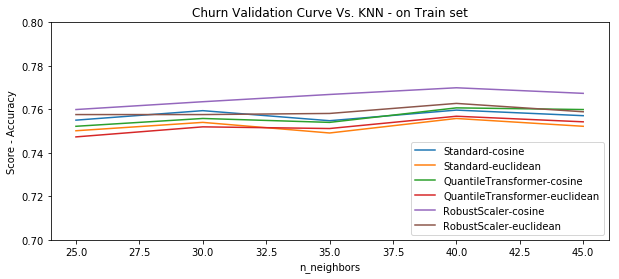

In [1237]:
scalers =np.array( [['Standard', StandardScaler], 
                   #['MinMax', MinMaxScaler], 
                   ['QuantileTransformer', QuantileTransformer],
                   #['Normalizer' , Normalizer ],
                   ['RobustScaler', RobustScaler]])

plt.figure(figsize=(10, 4))
legend =[]
for [scaler_name, scaler_func] in scalers:
    for metric in ['cosine', 'euclidean']:    #'hamming'
        scaler = scaler_func()
        scaler.fit(df_downsampled.drop('Churn', axis=1) )
        X = scaler.transform(df_downsampled.drop('Churn', axis=1)) 
        y = df_downsampled['Churn']
        param='n_neighbors'
        param_range = range(25,50,5)
        train_scores, test_scores = validation_curve(KNeighborsClassifier(metric=metric),
                                                     X, y,                                        
                                                     param_name=param,
                                                     param_range=param_range,
                                                     scoring="accuracy",
                                                     cv=5) 
        
        test_scores_mean = np.mean(test_scores, axis=1)
        plt.plot(param_range, test_scores_mean);
        legend.append(scaler_name+'-'+metric)

    plt.title("Churn Validation Curve Vs. KNN - on Train set")
    plt.xlabel(param)
    plt.ylabel("Score - Accuracy")
    plt.ylim(0.7, 0.8)      
    plt.legend(legend, loc='lower right')
plt.show()

#### !! The validation curve of 5 Train data folds yields a high accuracy at RobustScaler normalization with cosine metric.

### Searching for the best k by ploting knn with Different Normalization and Metrics   

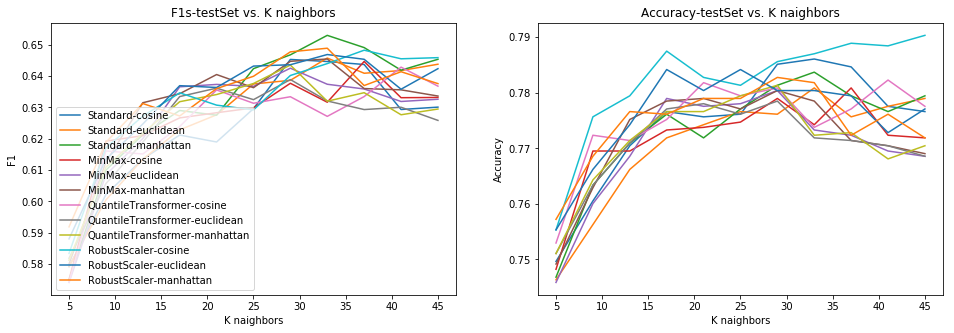

In [1333]:
scalers =np.array( [['Standard', StandardScaler], 
                   ['MinMax', MinMaxScaler], 
                   ['QuantileTransformer', QuantileTransformer],
                   #['Normalizer' , Normalizer ],
                   ['RobustScaler', RobustScaler]])
legend =[]
plt.figure(figsize=(16, 5))
for [scaler_name, scaler_func] in scalers:
    for metric in ['cosine', 'euclidean', 'manhattan']:  # 'hamming'
        scaler = scaler_func()
        scaler.fit(df_train.drop('Churn', axis=1) )
        X = scaler.transform(df_downsampled.drop('Churn', axis=1))
        y = df_downsampled['Churn']
        X_test = scaler.transform(df_test.drop('Churn', axis=1))
        y_test = df_test['Churn']
        roc_score = []
        f1s = []
        ks = []
        error = []
        accuracy_test = []
        for k in range(5,49, 4):  # highest accurecy peaks were founf in k=30, k=40. range k= 28,43,2 
            model = KNeighborsClassifier(n_neighbors=k, metric=metric)
            model.fit(X, y)
            y_test_pred = model.predict(X_test)
            ks.append(k)
            f1s.append(f1_score(y_true=y_test,y_pred=y_test_pred))            
            accuracy_test.append(accuracy_score(y_true=y_test, y_pred=y_test_pred))
        ax1=plt.subplot(1, 2, 1)
        ax2=plt.subplot(1, 2, 2)   
        ax1.plot(ks, f1s);
        ax2.plot(ks, accuracy_test);
        legend.append(scaler_name+'-'+metric)
        
ax1.legend(legend, loc='lower left')
ax1.set_xlabel('K naighbors')
ax2.set_xlabel('K naighbors')
ax1.set_title('F1s-testSet vs. K naighbors', fontsize=12)
ax2.set_title('Accuracy-testSet vs. K naighbors', fontsize=12);  
ax1.set_ylabel('F1')
ax2.set_ylabel('Accuracy');

###  Assess Knn model @ K=37, RobustScaler normalization with euclidean metric

In [1334]:
model = KNeighborsClassifier(n_neighbors=37, metric='cosine')  

# Scale Transform and normalization   
scaler = RobustScaler().fit(df_downsampled.drop('Churn', axis=1))  

X = scaler.transform(df_downsampled.drop('Churn', axis=1))  
y = df_downsampled['Churn']

model.fit(X, y);

In [1335]:
y_train_pred = model.predict(X)
df_train_pred['knn_train_pred'] = y_train_pred

### Lets see  the confusion matrix & the classification report:

In [1336]:
cm = confusion_matrix(y_true=y, y_pred=y_train_pred)
print(pcolor.BOLD + pcolor.UNDERLINE + '\nConfusion matrix on Train set:\n' + pcolor.END)
pd.DataFrame(cm, index=model.classes_, columns=model.classes_)


Confusion matrix on Train set:



,0,1
0,2200,400
1,455,840


In [1337]:
prob_y1 = model.predict_proba(X)[:,1]
roc_score = roc_auc_score(y, prob_y1)
print(pcolor.BOLD + pcolor.UNDERLINE + 'ROC curv score on train set: {:.2f} \n'.format(roc_score) + pcolor.END)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(pcolor.BOLD + pcolor.UNDERLINE + '\nConfusion matrix on Train set:\n' + pcolor.END,cm)

print (pcolor.BOLD + '\nClassification_report on Train set\n',classification_report(y_true=y, y_pred=y_train_pred) + pcolor.END)

ROC curv score on train set: 0.84 


Confusion matrix on Train set:
 [[0.84615385 0.15384615]
 [0.35135135 0.64864865]]

Classification_report on Train set
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      2600
           1       0.68      0.65      0.66      1295

    accuracy                           0.78      3895
   macro avg       0.75      0.75      0.75      3895
weighted avg       0.78      0.78      0.78      3895



### Validate KNN Model - Make churn Predictions 

In [1338]:
# Display test data counts
print(pcolor.BOLD + pcolor.UNDERLINE + pcolor.OKGREEN + 'Test data:' + pcolor.END + '    '+ pcolor.OKGREEN + '{:,d}'.format(df_test.shape[0]) + pcolor.END)
print(pcolor.BOLD + 'On-Going customers: {:,d}'.format(len(df_test[(df_test['Churn']==0)])))
print(pcolor.BOLD + 'Churn customers:    {:,d}'.format(len(df_test[(df_test['Churn']==1)]))) 


Test data:    2,113
On-Going customers: 1,539
Churn customers:    574


In [1339]:
del X_test
del y_test

In [1340]:
X_test = scaler.transform(df_test.drop('Churn', axis=1)) 
y_test = df_test['Churn']

y_test_pred = model.predict(X_test)
df_test_pred['knn_test_pred'] = y_test_pred

In [1341]:
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(pcolor.BOLD + '\nConfusion matrix on Test set:\n' + pcolor.END)
pd.DataFrame(cm, index=model.classes_, columns=model.classes_)


Confusion matrix on Test set:



,0,1
0,1289,250
1,183,391


In [1342]:
### Predict class probabilities
prob_y1 = model.predict_proba(X_test)[:,1]
### the AUROC of the model
roc_score = roc_auc_score(y_test, prob_y1)
print(pcolor.BOLD + pcolor.UNDERLINE + 'ROC curv score on test set: {:.2f} \n'.format(roc_score) + pcolor.END)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(pcolor.BOLD + '\nConfusion matrix on Test set:\n' + pcolor.END,cm)
print (pcolor.BOLD + '\nClassification_report on Test set\n' + pcolor.END,classification_report(y_true=y_test, y_pred=y_test_pred))

ROC curv score on test set: 0.85 


Confusion matrix on Test set:
 [[0.83755686 0.16244314]
 [0.31881533 0.68118467]]

Classification_report on Test set
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1539
           1       0.61      0.68      0.64       574

    accuracy                           0.80      2113
   macro avg       0.74      0.76      0.75      2113
weighted avg       0.80      0.80      0.80      2113



In [1343]:
print(pcolor.OKBLINK+ pcolor.BOLD +pcolor.OKPUR + 'KNN accurecy: {:.2f}'.format(model.score(X_test,y_test)))

KNN accurecy: 0.80


## 3.3  Decision Trees -  classification method

In [1457]:
del X
del y
del X_test
del y_test

In [1458]:
X = df_downsampled.drop('Churn', axis=1)
y = df_downsampled.Churn
X_test = df_test.drop('Churn', axis=1)
y_test = df_test.Churn

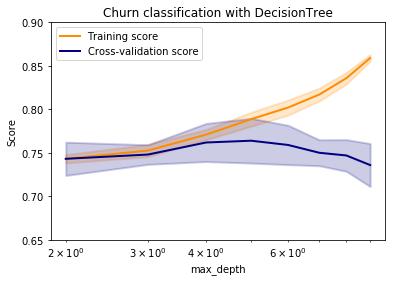

In [1346]:
param='max_depth'
param_range = range(2,10)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X, y,
                                            param_name=param,
                                            param_range=param_range, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Churn classification with DecisionTree")
plt.xlabel(param)
plt.ylabel("Score")
plt.ylim(0.65, 0.9)

# ax = plt.plot
# ax.axis(param_range)
# for axis in ax.axis:
#     axis.set_major_formatter(ScalarFormatter())
    
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [1547]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X, y);

In [1548]:
y_train_pred = model.predict(X)
df_train_pred['Tree_train_pred'] = y_train_pred

In [1549]:
export_graphviz(decision_tree=model,
                out_file='churn_tree.dot',
                feature_names=list(X.columns.values),
                class_names=['0', '1'],
                leaves_parallel=True,
                filled=True,
                rotate=False,
                rounded=True)

In [1550]:
cm=confusion_matrix(y_true=y, y_pred=model.predict(X))
print(pcolor.BOLD + '\nConfusion matrix on train set:\n' + pcolor.END , cm)

print(pcolor.BOLD + '\nClassification_report:\n' + pcolor.END, classification_report(y_true=y, y_pred=model.predict(X)))


Confusion matrix on train set:
 [[2131  469]
 [ 427  868]]

Classification_report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      2600
           1       0.65      0.67      0.66      1295

    accuracy                           0.77      3895
   macro avg       0.74      0.74      0.74      3895
weighted avg       0.77      0.77      0.77      3895



In [1551]:
df_test.Churn.value_counts()

0    1539
1     574
Name: Churn, dtype: int64

In [1552]:
y_test_pred = model.predict(X_test)
df_test_pred['Tree_test_pred'] = y_test_pred

In [1546]:
cm=confusion_matrix(y_true=y_test, y_pred=model.predict(X_test))
print(pcolor.BOLD + '\nConfusion matrix on test set:\n' + pcolor.END , cm)

print(pcolor.BOLD + '\nClassification_report:\n' + pcolor.END, classification_report(y_true=y_test, y_pred=model.predict(X_test)))


Confusion matrix on test set:
 [[1352  187]
 [ 268  306]]

Classification_report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1539
           1       0.62      0.53      0.57       574

    accuracy                           0.78      2113
   macro avg       0.73      0.71      0.71      2113
weighted avg       0.78      0.78      0.78      2113



In [1518]:
print(pcolor.OKBLINK+ pcolor.BOLD +pcolor.OKYELL + 'Decision trees score: {:.2f}'.format(model.score(X_test,y_test)))

Decision trees score: 0.78


### Decision trees - Visualized form

<img src="churn_tree.JPG" title="churn_tree" style="width: 1000px; hight: 200px"/>

## 4.  Some observations

As seen in the EDA, some features have a negative relation to the Churn variable, while some have positive relation. 
Negative relation means that churn decreases with those features. 
To summarize:

* The chances of churn reduces with 2 year contract. 
* Two year contract combined with tenure yields the most negative relation with Churn.
* The features that leads to a higher churn rates are: month to month contract, no online security, no tech-support and fiber-optic internet service
* Having DSL internet service slightly reduces the proability of Churn.

Machine Learning:
* Logistic Regression model provided the best estimation results with an accuricy of 80% F1=64% and precision=63%.